In [1]:
import pandas as pd
import numpy as np
import kinematics as kin
import matplotlib.pyplot as plt
import PlotModule as plot

# Classwork 5
In our module kinematics, we wrote a function to integrate a set of data, and a function to zero said set of data given an initial period of calibration. The integration function utilizes the Trapezoidal integration rule, and the zero function simply takes the average value of the calibration period, then subtracts that value from the entire data set. However, even with this add, the position data set that is acquired ends up fairly inaccurate and I'm not sure why yet. Here, I've read in all the data from a Helix motion, and plotted the x acceleration, the x velocity, and the x position, with no modifications at all:

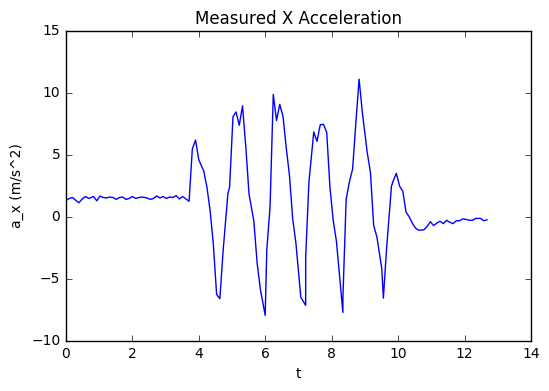

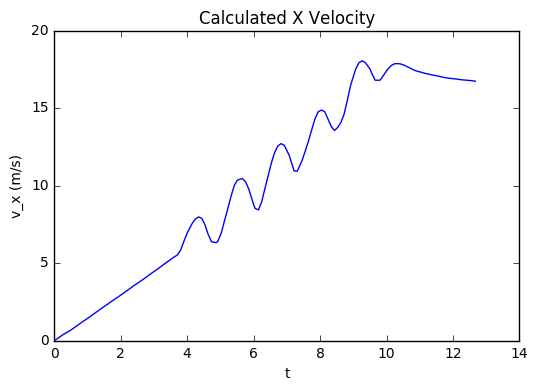

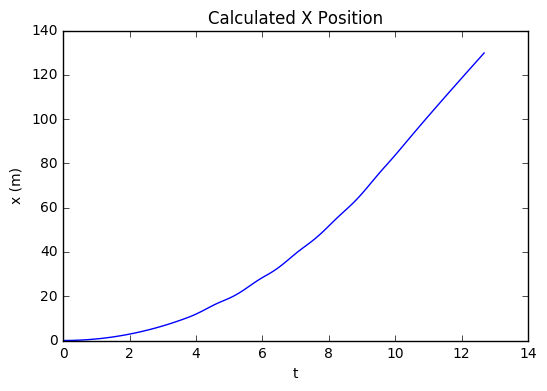

In [2]:
plot.plotRaw('x','AccelerationTest.csv')

And here is the barometric altitude measured by the device, plotted against the extracted position data. 

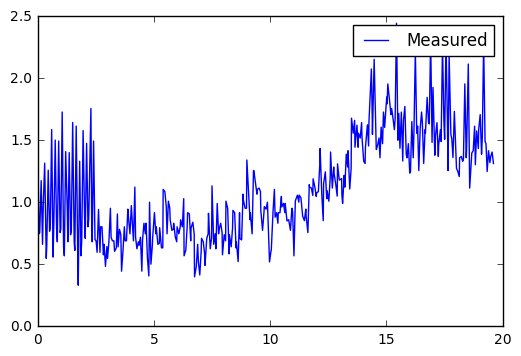

In [3]:
#getting barometric altitude values
dfb = pd.read_csv('HelixBarometer.csv')
alt = dfb[' Pressure Altitude (m)']
time = dfb[' t']

plt.plot(time,alt)
plt.legend(['Measured','Extracted'])
plt.show()

Clearly there's quite a disconnect between the extracted data and what actually happened; in fact, this test was just a helix, roughly two feet wide, rising about a meter. One thing I tried was to simply zero the data, such that I was assuming $v_0 = 0, a_0 = 0, x_0 = 0$. Here's the result of that:

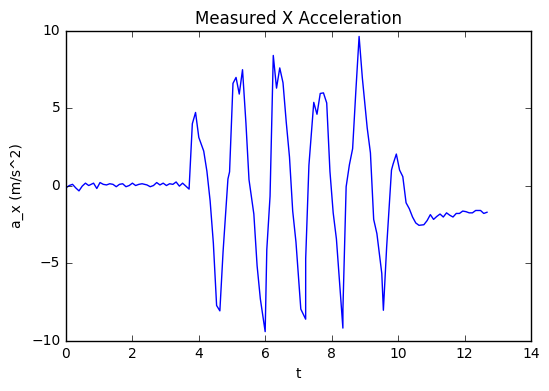

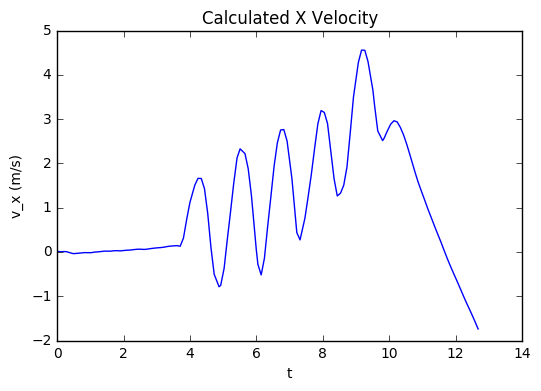

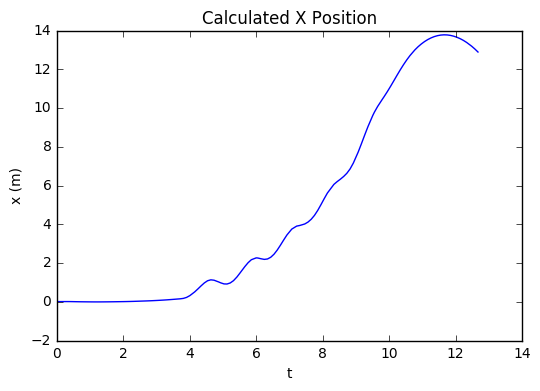

In [4]:
plot.plotZero('x',0,20,'AccelerationTest.csv')

This got my data a little more accurate, but still with a large error, especially in position. As mentioned, there seems to be a systematic drift in the measurement, implying that perhaps we're exceeding the abilities of the Pocket Lab. I tried also correcting for the drift, by finding the difference between the zero at the beginning and the zero at the end (because the device was stationary at the end as well as the beginning), and adjusting the data accordingly, but this actually worsened the velocity and position data. That's because the drift of the zero seemed to be downward, but the velocity and position were too far positive, so getting rid of the negative drift made velocity and position even more positive. Here's what I mean:

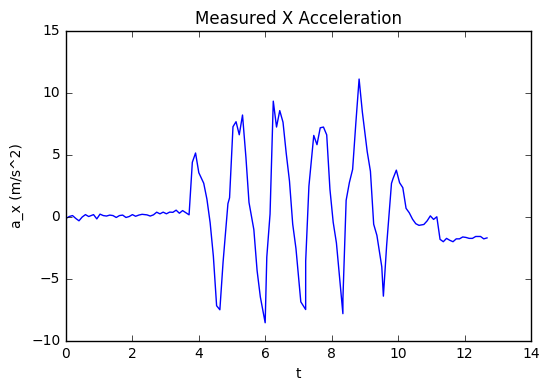

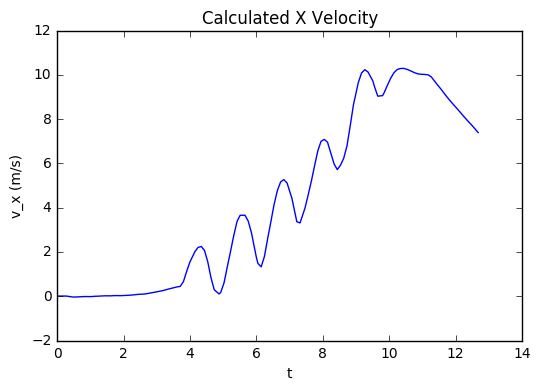

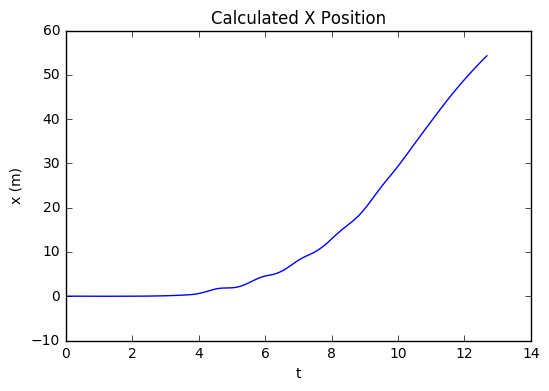

In [5]:
plot.plotDriftCorrected('x',0,20,20,112,'AccelerationTest.csv')

As you can see, it's still quite off; actually, more off than before. So I think we've exceeded the capabilities of the Pocket Lab. And also now I want to stick to whiteboards and let somebody else test things. 